# Analysis report

Fredrik Fagerholm 30.11.2016  

Data understanding and visualization  
Analysis report for TKO 3103 Exercise work 1.0 in course Data Analysis and Knowledge Discovery

## Data set
Dataset of white variant of the Portuguese "Vinho Verde" wine.
[Source](http://archive.ics.uci.edu/ml/datasets/Wine+Quality)



### Attributes
#### Input variables (based on physicochemical tests):
Fixed acidity (g(tartaric acid)/dm3)  
Volatile acidity (g(acetic acid)/dm3)   
Citric acid (g/dm3)  
Residual sugar (g/dm3)  
Chlorides (g(sodium chloride)/dm3)  
Free sulfur dioxide (mg/dm3)  
Total sulfur dioxide (mg/dm3)  
Density (g/cm3)  
pH   
Sulphates (g(potassium sulphate)/dm3)  
Alcohol (vol.%)  

#### Output variable (based on sensory data):   
Quality (score between 0 and 10) 


In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, decomposition, manifold
from sklearn.metrics import euclidean_distances
import random

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pandas.tools.plotting import scatter_matrix, parallel_coordinates
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,12]

## Analysis

#### Summary statistics

We read the data into a pandas dataframe and print summary statistics for the data.

In [2]:
wine_data = pd.read_csv('winequality-white.csv', sep=";")
wine_data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

### 1) Histograms

Plotting the histograms of the data using different methods for choosing the number of bins or bin width.
The formulas used are Sturge's rule, Scott’s rule, Square-root choice, and Freedman-Diaconis’ choice.
Bin counts/widths are calculated and histograms are plotted using pandas (numpys) built in method hist.

#### Results & observations

Sturges rule seems to give the "best" number of bins for the data overall. The resulting plots show that the frequencies of the values for the attributes follow the normal distribution quite well, which is plausible.
Using the other rules give more jagged plots for some attributes, this may be due to outliers in the data.
For Scott’s rule the plots for chlorides, pH, quality, residual sugar, total sulphur dioxide and volatile acidity  still look good.
For Square-root choice the plots for chlorides, density, free sulfur dioxide, quality and total sulphur dioxide still look good.
For Freedman-Diaconis’ choice the plots for quality and total sulphur dioxide still look good.

Histograms for alcohol, chlorides, free sulfur dioxide, residual sugar and volatile acidity seem to be skewed to the right.
The ones for citric acid, density, fixed acidity, pH, quality, sulphates, total sulphur dioxide seem to be symmetric and unimodal.




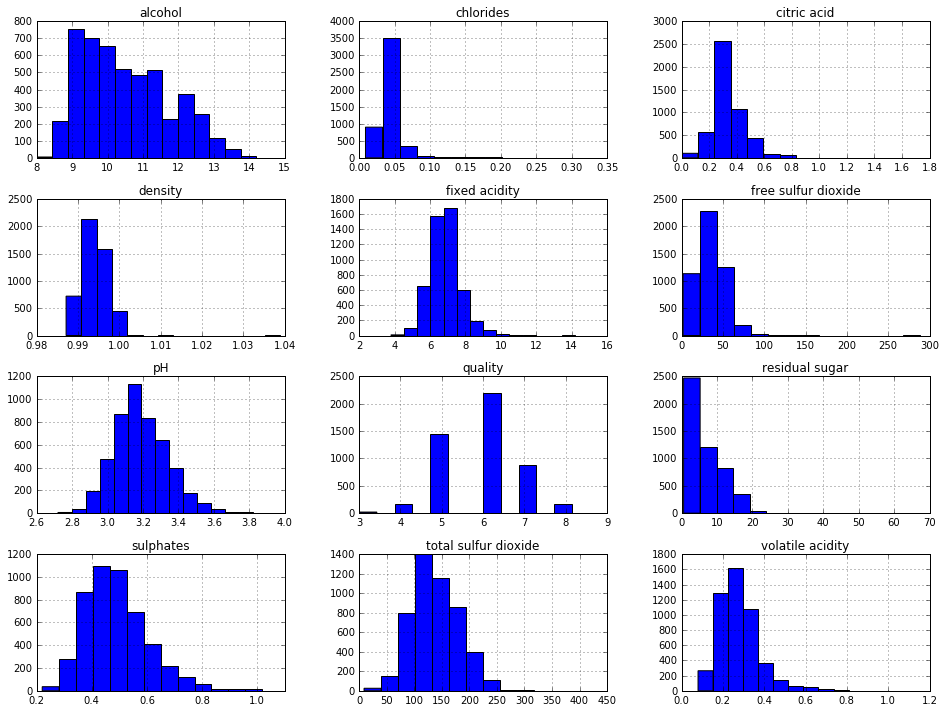

In [3]:
# Histograms where the number of bins k is calculated using Sturge's rule
_ = wine_data.hist(bins="sturges")

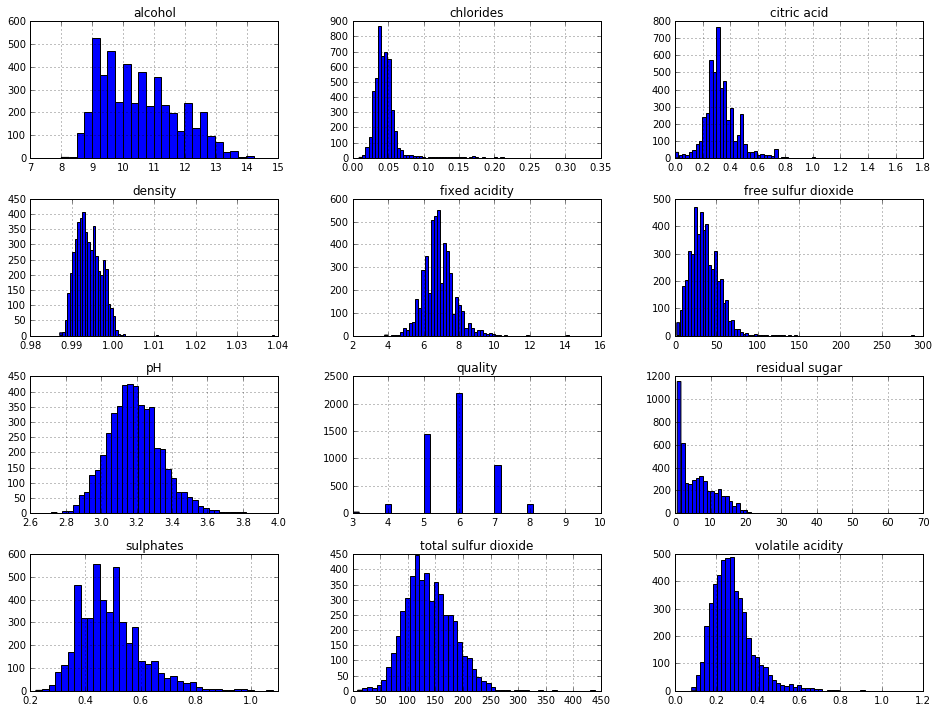

In [4]:
# Histograms where the bin width h is calculated using Scott's rule
_ = wine_data.hist(bins="scott")

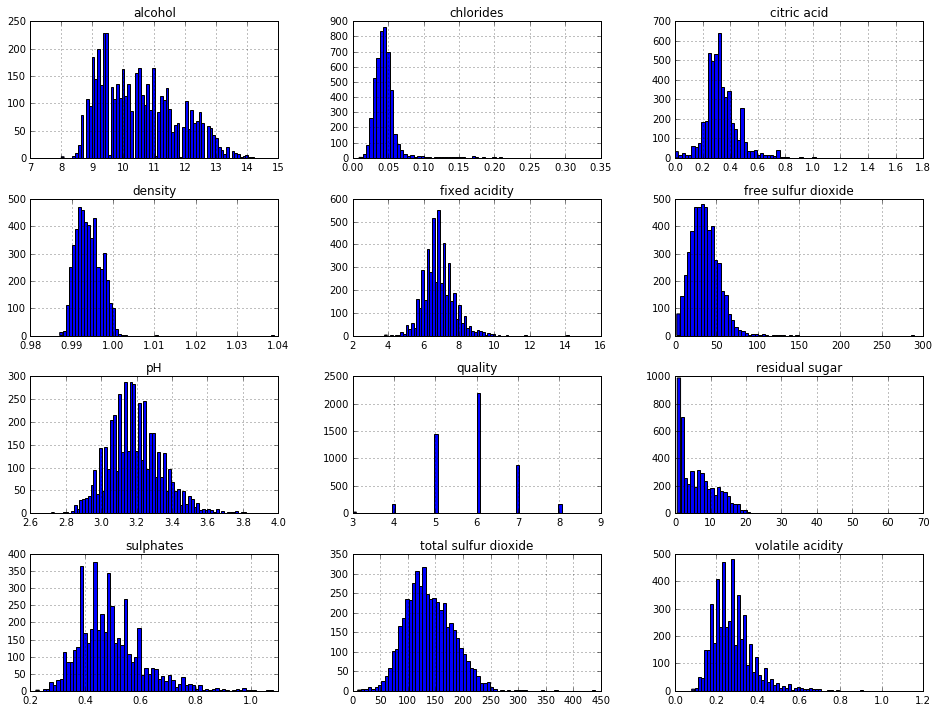

In [5]:
# Histograms where the number of bins k is calculated using Square-root choice
_ = wine_data.hist(bins="sqrt")

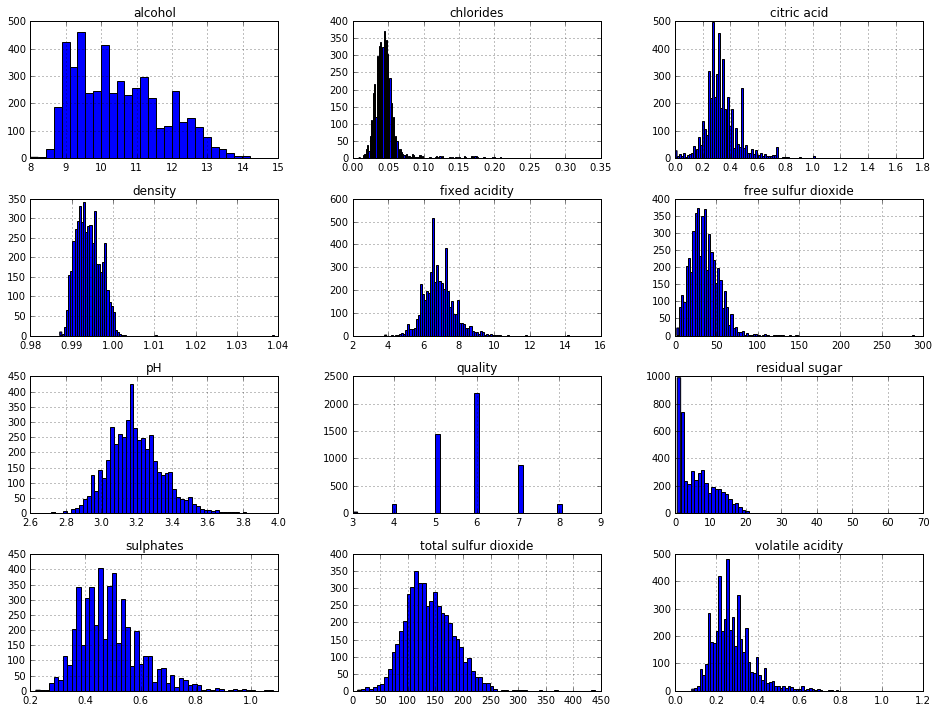

In [6]:
# Histograms where the bin width h is calculated Freedman-Diaconis’ choice
_ = wine_data.hist(bins="fd")

### 2) Boxplots

Boxplots of data using pandas method boxplot. 

#### Results & observations

Every attribute seems to have at least a few data points classified as outliers (value below Q1 - 1.5\*IQR or above Q3 + 1.5\*IQR) by the boxplot method. Attributes volatile acidity, citric acid, chlorides and sulphates have especially much. Attributes fixed acidity, free sulfur dioxide and pH have some outliers. Attributes residual sugar, total sulphur dioxide, density, alcohol and quality seem to have very few outliers.
 

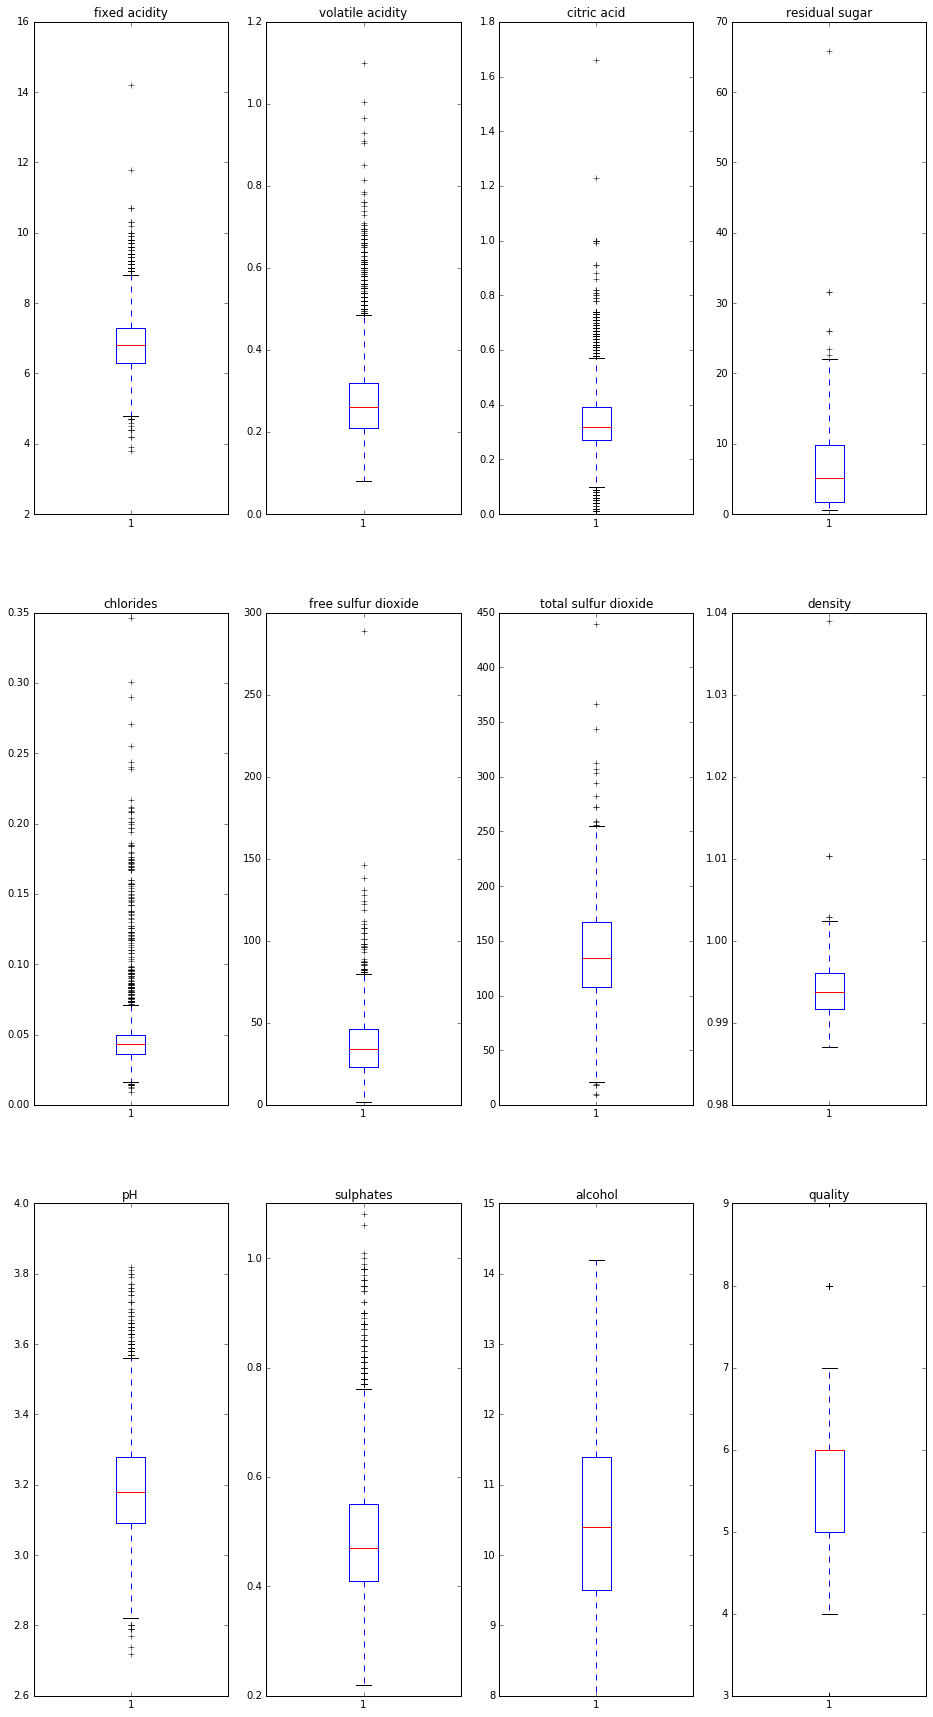

In [7]:

ROWS, COLS = 3, 4
fig, axarr = plt.subplots(ROWS, COLS, figsize=(16, 30))
indicies = [(i, j) for i in range(ROWS) for j in range(COLS)]
for ix, col_name in zip(indicies, wine_data.columns):
    axarr[ix].boxplot(wine_data[col_name])
    axarr[ix].set_title(col_name)


### 3) Scatter plots

Scatter plots of attributes of the data taken pairwise. Data is plotted unsing pandas method scatter_matrix. 
Each scatter plot is the attribute in that column plotted against the attribute in that row. The plots in the diagonal are the density estimation plots for that row/diagonal attribute. 

#### Results & observations

Inspecting the plots we may note that there may be correlation between a some of the attributes.  
The attributes residual sugar and alcohol seems to be linearly correlated to desity. This sounds reasonable since both affect density of their solvents/mixtures, and make up a considerable part of the volume of a wine.
Fixed acidity seems to be linearly correlated to pH.
Free sulfur dioxide seems to be linearly correlated to total sulfur dioxide

Chlorides seems to be linearly correlated to pH, sulphates and alcohol.
Free sulfur dioxide seems to be linearly correlated to pH, sulphates and alcohol.
Density seems to be linearly correlated to pH, sulphates and alcohol.


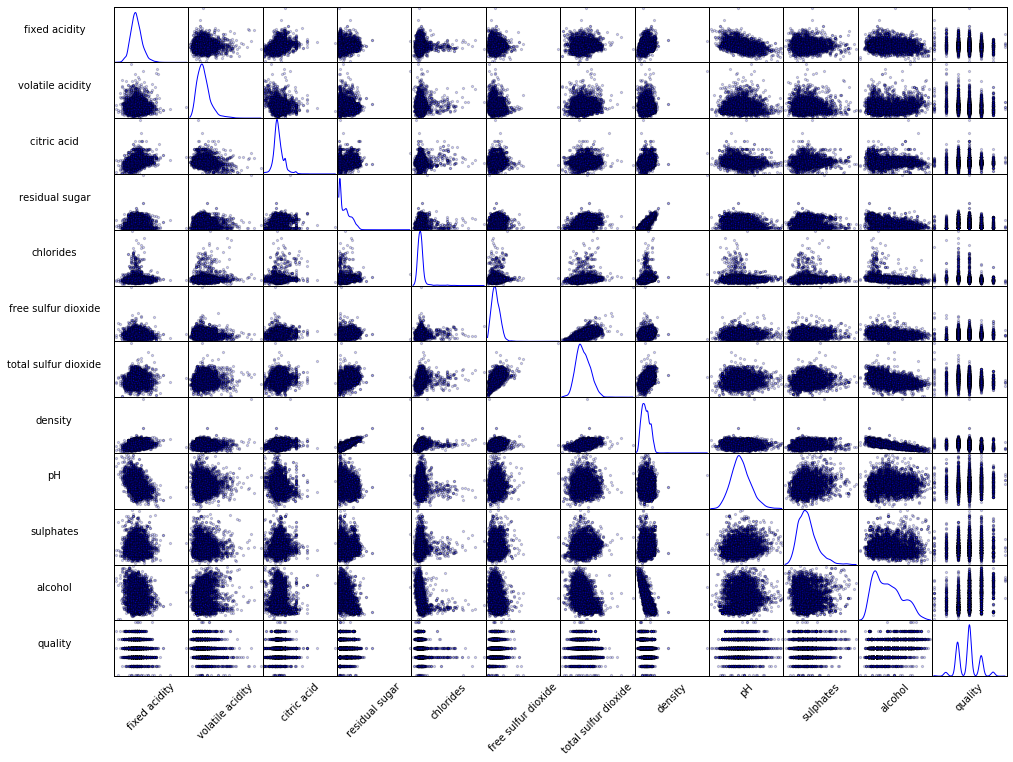

In [8]:
sm = scatter_matrix(wine_data, alpha=0.2, diagonal='kde')

#Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

[s.get_yaxis().set_label_coords(-0.8,0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

### Parallel coordinates plot

Parallel coordinates plot of data with respect to the quality score. Data is plotted using pandas parallel_coordinates method.  
We scale the data to the range [0, 1], except the scores (parallel_coordinates function does not handle this?).

#### Results & observations

Any clear clustering can not be detected in the plot (at least with this ordering of columns).
Some of the wines with a lower quality score seem ho have higher relative values for chlorides and sulphur dioxide, and the value for other features seems vary more in comparison to wines with a higher quality score.

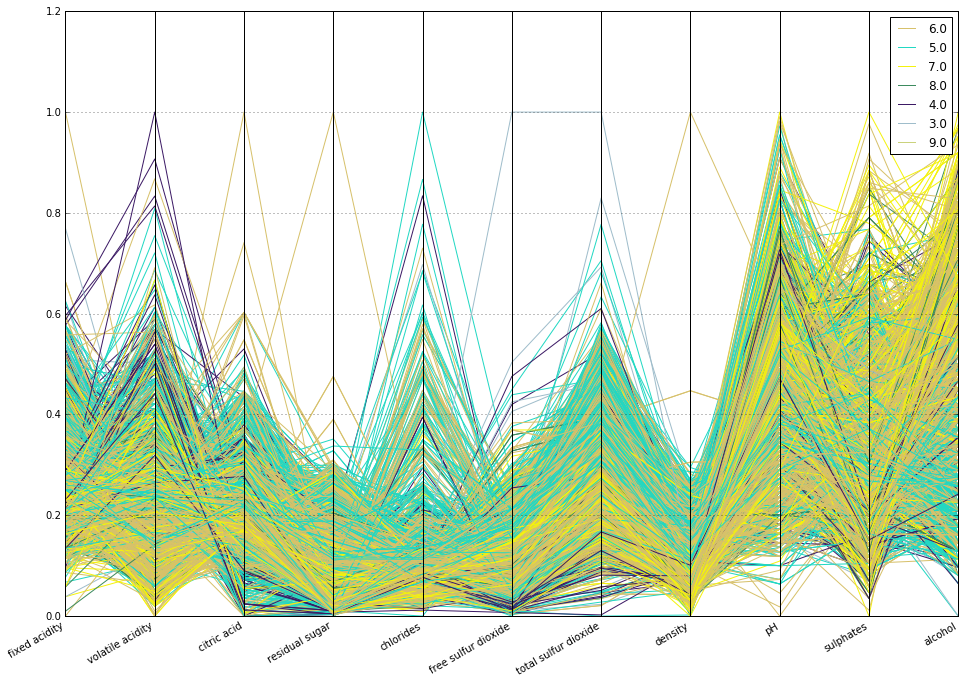

In [9]:
wine_data_values = wine_data.values 
data_values, scores = wine_data_values[:, range(11)], np.array([wine_data_values[:, 11]]).transpose()

min_max_scaler = preprocessing.MinMaxScaler()
scaled_values = min_max_scaler.fit_transform(data_values)

scaled_data = np.concatenate([scaled_values, scores], axis=1)
scaled_wine_data = pd.DataFrame(data=scaled_data, columns=wine_data.columns)

fig, ax = plt.subplots()
fig.autofmt_xdate()
_ = parallel_coordinates(scaled_wine_data, "quality")

### 4) Principal component analysis

Principal component analysis is done using the scikit-learn module decomposition.PCA. 
We calculate the principial components and project the data (without quality scores) onto the two first components. First without and then with z-score standardization. We print the proportions of variance explained by the components and produce scatter plots for the projected data. Color represents the quality score in the plots.  
Standardization is handled by the scikit-learn module preprocessing.StandardScaler.

#### Results & observations

There does not seem to be significant clustering for the different quality values in the plots. In the plot for the projected standardized data the points tend to be skewed either to the right or the left on the x-axis depending on their quality scores. There seems to be more outliers in among the datapoints with a lower quality score (<5), and the ones with higher scores are more tightly clustered.

The proportion of the variance explained by the first component is much higher for the non-standardized data, this is due to the attributes having different units and ranges.

Proportions of variance explained by the components: [ 0.90965734  0.07933386]


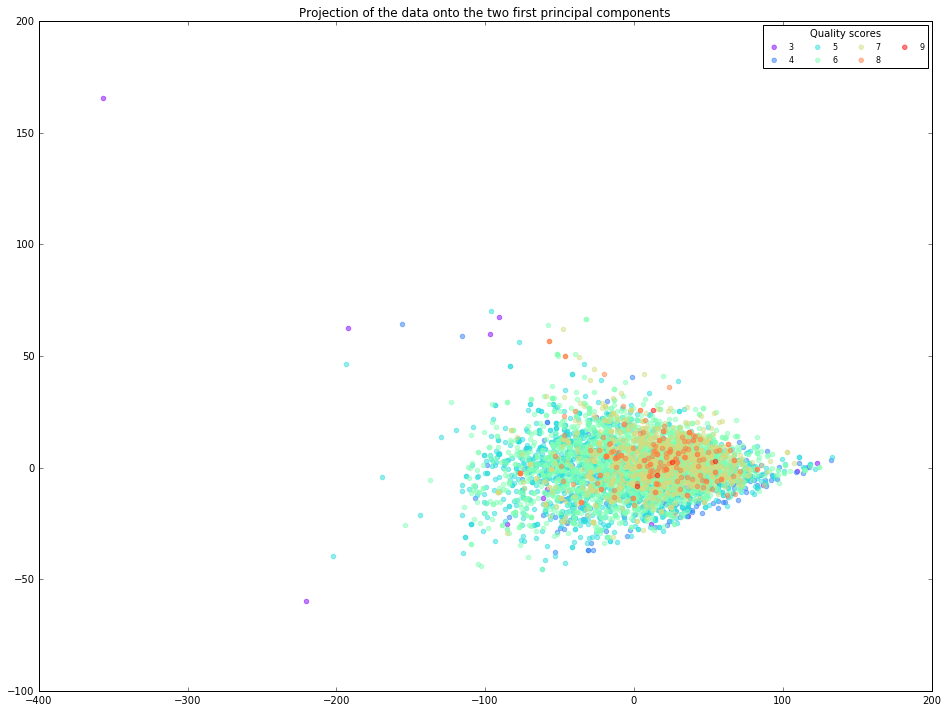

In [10]:
# PCA without standardization
wine_data_values = wine_data.values 
data_values, scores = wine_data_values[:, range(11)], np.array([wine_data_values[:, 11]]).transpose()

pca1 = decomposition.PCA(n_components=2)
pca1.fit(data_values)
wine_data_proj = pca1.transform(data_values)
print "Proportions of variance explained by the components:", pca1.explained_variance_ratio_

grouped_data = [[] for i in range(7)]
for point, quality in zip(wine_data_proj, scores):
    grouped_data[int(quality) - 3].append(point)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Projection of the data onto the two first principal components")
colors = cm.rainbow(np.linspace(0, 1, 7))
plots = []
for i in range(7):
    plots.append(plt.scatter(*zip(*grouped_data[i]), alpha=0.5, color=colors[i]))
    
_ = plt.legend(plots,
               range(3,10),
               title="Quality scores",
               scatterpoints=1,
               ncol=4,
               fontsize=8)

Proportion of variance explained by the components: [ 0.29293217  0.14320363]


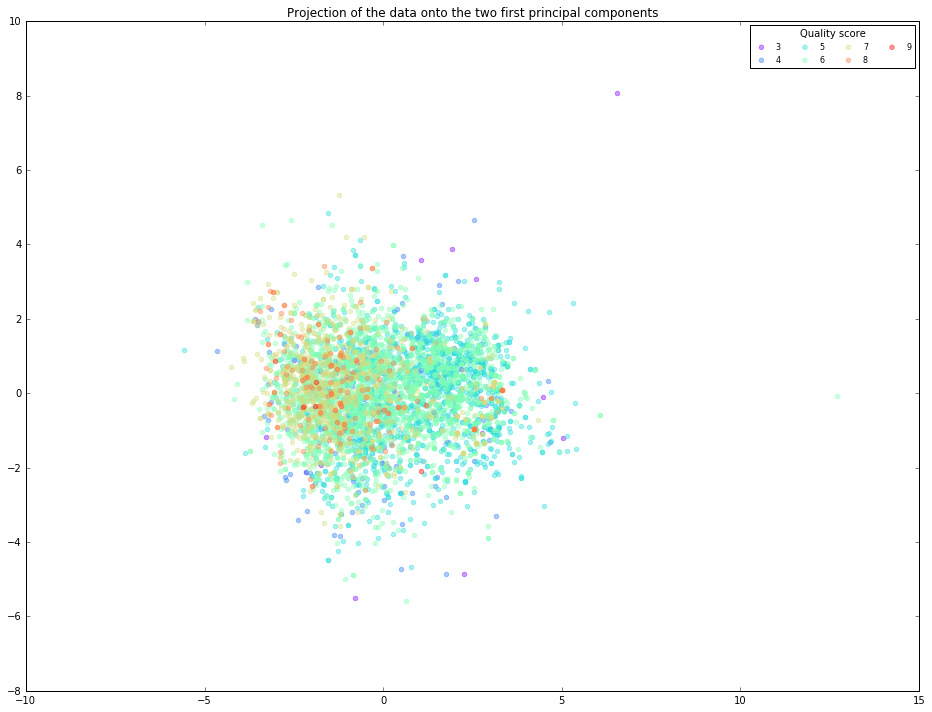

In [11]:
# PCA with standardization
wine_data_values = wine_data.values 
data_values, scores = wine_data_values[:, range(11)], np.array([wine_data_values[:, 11]]).transpose()

standard_scaler = preprocessing.StandardScaler() 
standardized_values = standard_scaler.fit_transform(data_values)

pca2 = decomposition.PCA(n_components=2)
pca2.fit(standardized_values)
standardized_values_proj = pca2.transform(standardized_values)
print "Proportion of variance explained by the components:", pca2.explained_variance_ratio_


grouped_standardized_data = [[] for i in range(7)]
for point, quality in zip(standardized_values_proj, wine_data_values[:, 11]):
    grouped_standardized_data[int(quality) - 3].append(point)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Projection of the data onto the two first principal components")

colors = cm.rainbow(np.linspace(0, 1, 7))
plots = []
for i in range(7):
    plots.append(plt.scatter(*zip(*grouped_standardized_data[i]), alpha=0.4, color=colors[i]))

_ = plt.legend(plots,
               range(3,10),
               title="Quality score",
               scatterpoints=1,
               ncol=4,
               fontsize=8)

### 2D MDS representation

We produce a low-dimensional representation of the data using Multi-dimensional Scaling. First with and then without z-score standardization. Multi-dimensional Scaling is handled by the scikit-learn module manifold.MDS. 
We preform the MDS using similarities in the data measured as euclidean distance. Distance computation is handle by the method metrics import euclidean_distances from the scikit-learn package.

We divide the data into groups by the quality scores. Then perform MDS on a random sample of (maximum) size 200 from each group (Some groups are a lot smaller e.g. the number of records where the score is 3 or 9 is below 30). Sampling is done to ease the computational burden.

The MDS of the groups are computed and the resulting embeddings are plotted as scatter plots, each with a different color.

#### Results & observations

Examining the plot for the standardized transformed data there seem to be some outliers, especially for the datapoints with a lower quality score, similarly to the PCA plots. This may be due to that these groups have a smaller number of datapoints, and are therefore more sensitive to noise. As with the PCA plots points with higher scores seems more tightly clustered, but they aren't distributed along the x-axis in the same way.

In the MDS done without standardization the resulting embeddings seem to form ellipse shaped clusters, this again may be due to some dominating attributes.


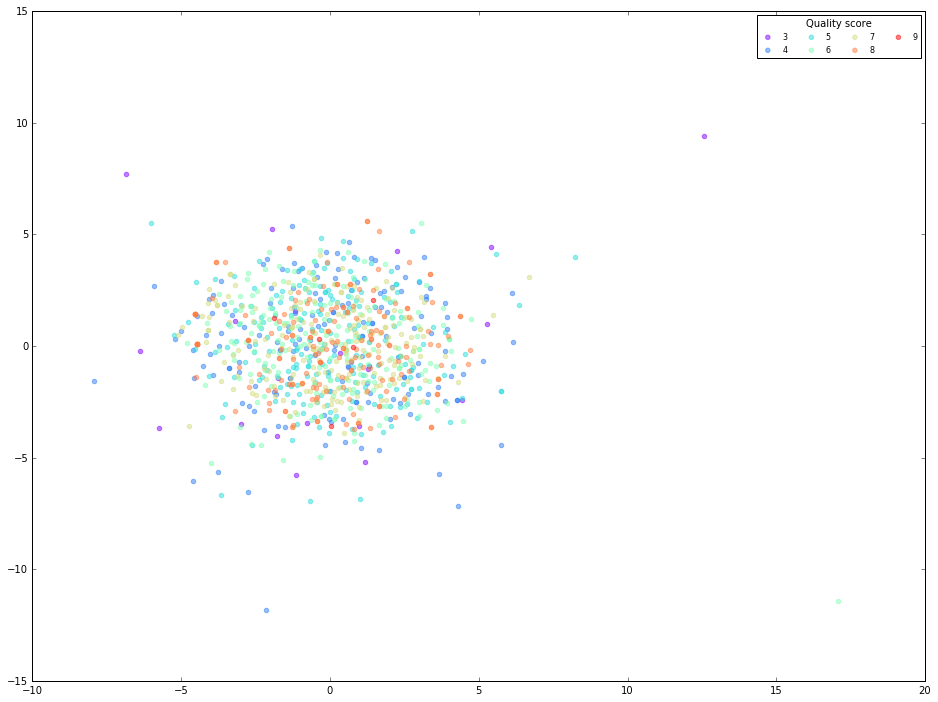

In [12]:
# With standardization

wine_data_values = wine_data.values 
data_values, scores = wine_data_values[:, range(11)], np.array([wine_data_values[:, 11]]).transpose()
standard_scaler = preprocessing.StandardScaler()
wine_data_values = standard_scaler.fit_transform(data_values)

grouped_wine_data = [[] for i in range(7)]
for record, quality in zip(wine_data_values[:, range(11)], scores):
    grouped_wine_data[int(quality) - 3].append(record)

plots = []
colors = cm.rainbow(np.linspace(0, 1, 7))
for i, group in enumerate(grouped_wine_data):
    np.random.shuffle(group)
    training_data = group[:200]
    distance_matrix = euclidean_distances(training_data)
    #seed = np.random.RandomState(seed=3)
    mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9,
                       dissimilarity="precomputed")
    pos = mds.fit(distance_matrix).embedding_
    plots.append(plt.scatter(*zip(*pos), alpha=0.5, color=colors[i]))
    
_ = plt.legend(plots,
               range(3,10),
               title="Quality score",
               scatterpoints=1,
               ncol=4,
               fontsize=8)

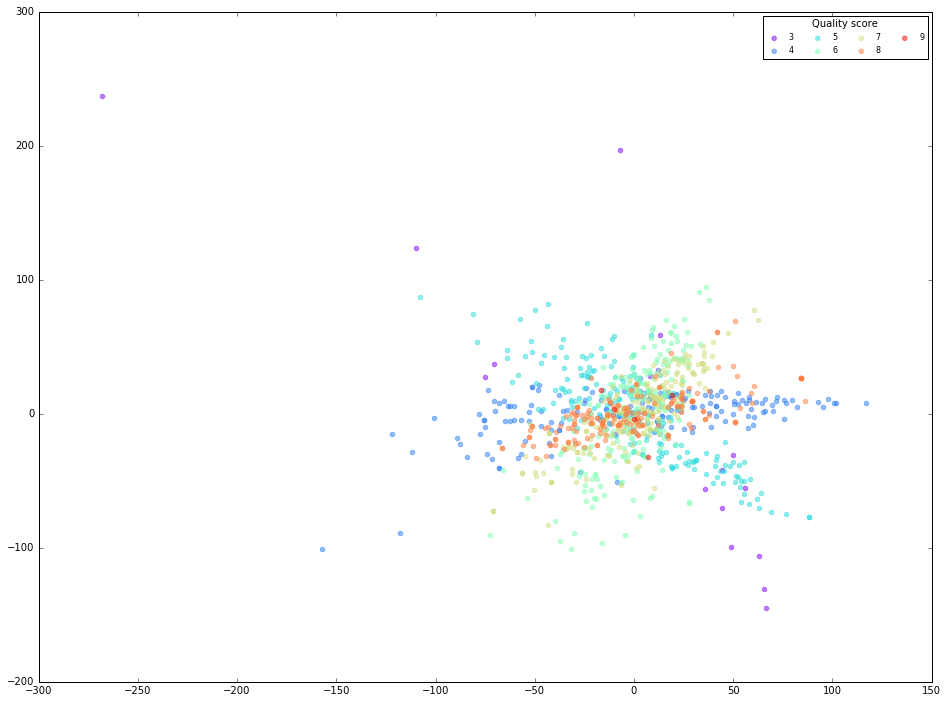

In [13]:
# Without standardization

wine_data_values = wine_data.values 

grouped_wine_data = [[] for i in range(7)]
for record, quality in zip(wine_data_values[:, range(11)], wine_data_values[:, 11]):
    grouped_wine_data[int(quality) - 3].append(record)

    
plots = []
colors = cm.rainbow(np.linspace(0, 1, 7))
for i, group in enumerate(grouped_wine_data):
    np.random.shuffle(group)
    training_data = group[:200]
    distance_matrix = euclidean_distances(training_data)
    mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9,
                       dissimilarity="precomputed")
    pos = mds.fit(distance_matrix).embedding_
    plots.append(plt.scatter(*zip(*pos), alpha=0.5, color=colors[i]))
    
_ = plt.legend(plots,
               range(3,10),
               title="Quality score",
               scatterpoints=1,
               ncol=4,
               fontsize=8)

## 6) Correlation tables

We calculate the correlation between the attributes pairwise, using Pearson’s, Spearman’s rho and Kendall’s tau correlation measures. All measures are calculated using pandas built in method corr.

Many of the same attributes show similar (positive/negative) correlations accoring to all three measures.

#### Pearson correlation

 Free sulfur dioxide seems to be linearly correlated to total sulfur dioxide
Chlorides seems to be linearly correlated to pH, sulphates and alcohol. Free sulfur dioxide seems to be linearly correlated to pH, sulphates and alcohol. Density seems to be linearly correlated to pH, sulphates and alcohol.

As we observed with the scatter plots of pairwise attributes, there is strong linear correlation between some attributes such as "desity" and "residual sugar" and "alcohol" respectively as well as between "total sulfur dioxide" and "free sulfur dioxide". Somewhat weaker correlations were "total sulfur dioxide" and "density", "pH" and "Fixed acidity". "alcohol" is positively correlated to the "quality".

In [14]:
wine_data.corr(method='pearson')

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.089021   0.023086            -0.049396   
volatile acidity            0.064286   0.070512            -0.097012   
citric acid                 0.094212   0.114364             0.094077   
residual sugar              1.000000   0.088685             0.299098   
chlorides                   0.088685   1.000000             0.101392   
free sulfur dioxide         0.299098   0.101392             1.000000   
total sulfur dioxide        0.401439   0.198910             0.615501   
density                     0.838966   0.257211             0.294210   
pH                         -0.194133  -0.090439            -0.000618   
sulphates                  -0.026664   0.016763             0.059217   
alcohol                    -0.450631  -0.360189            -0.250104   
quality                    -0.097577  -0.209934             0.008158   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                     0.091070  0.265331 -0.425858  -0.017143   
volatile acidity                  0.089261  0.027114 -0.031915  -0.035728   
citric acid                       0.121131  0.149503 -0.163748   0.062331   
residual sugar                    0.401439  0.838966 -0.194133  -0.026664   
chlorides                         0.198910  0.257211 -0.090439   0.016763   
free sulfur dioxide               0.615501  0.294210 -0.000618   0.059217   
total sulfur dioxide              1.000000  0.529881  0.002321   0.134562   
density                           0.529881  1.000000 -0.093591   0.074493   
pH                                0.002321 -0.093591  1.000000   0.155951   
sulphates                         0.134562  0.074493  0.155951   1.000000   
alcohol                          -0.448892 -0.780138  0.121432  -0.017433   
quality                          -0.174737 -0.307123  0.099427   0.053678   

                       alcohol   quality  
fixed acidity        -0.120881 -0.113663  
volatile acidity      0.067718 -0.194723  
citric acid          -0.075729 -0.009209  
residual sugar       -0.450631 -0.097577  
chlorides            -0.360189 -0.209934  
free sulfur dioxide  -0.250104  0.008158  
total sulfur dioxide -0.448892 -0.174737  
density              -0.780138 -0.307123  
pH                    0.121432  0.099427  
sulphates            -0.017433  0.053678  
alcohol               1.000000  0.435575  
quality               0.435575  1.000000

#### Spearman's rho

Some attributes have stronger monotonic relationships between them than others.
Ther seems to be a strong decreasing monotonic trend between "alcohol" and "density" (higher vol% alcohol -> lower density) and a strong increasing monotonic trend between "residual sugar" and "density" (more sugar -> higher density). Also and increasing trend between "free sulfur dioxide" and "total sulfur dioxide" as well as "density" and "total sulfur dioxide"/"chlorides". Decreasing monotonic trend between "alcohol" and "chlorides". 
Increasing monotonic trend between "alcohol" and "quality".

In [15]:
wine_data.corr(method='spearman')

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.042865     0.297878   
volatile acidity          -0.042865          1.000000    -0.150410   
citric acid                0.297878         -0.150410     1.000000   
residual sugar             0.106725          0.108627     0.024621   
chlorides                  0.094691         -0.004934     0.032659   
free sulfur dioxide       -0.024542         -0.081213     0.088314   
total sulfur dioxide       0.112649          0.117614     0.093219   
density                    0.270031          0.010124     0.091425   
pH                        -0.418341         -0.045204    -0.146193   
sulphates                 -0.013238         -0.016902     0.079766   
alcohol                   -0.106827          0.033967    -0.029170   
quality                   -0.084485         -0.196562     0.018333   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.106725   0.094691            -0.024542   
volatile acidity            0.108627  -0.004934            -0.081213   
citric acid                 0.024621   0.032659             0.088314   
residual sugar              1.000000   0.227844             0.346107   
chlorides                   0.227844   1.000000             0.167046   
free sulfur dioxide         0.346107   0.167046             1.000000   
total sulfur dioxide        0.431252   0.375244             0.618616   
density                     0.780365   0.508302             0.327822   
pH                         -0.180028  -0.054006            -0.006274   
sulphates                  -0.003844   0.093931             0.052252   
alcohol                    -0.445257  -0.570806            -0.272569   
quality                    -0.082070  -0.314488             0.023713   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                     0.112649  0.270031 -0.418341  -0.013238   
volatile acidity                  0.117614  0.010124 -0.045204  -0.016902   
citric acid                       0.093219  0.091425 -0.146193   0.079766   
residual sugar                    0.431252  0.780365 -0.180028  -0.003844   
chlorides                         0.375244  0.508302 -0.054006   0.093931   
free sulfur dioxide               0.618616  0.327822 -0.006274   0.052252   
total sulfur dioxide              1.000000  0.563824 -0.011829   0.157825   
density                           0.563824  1.000000 -0.110061   0.095079   
pH                               -0.011829 -0.110061  1.000000   0.140243   
sulphates                         0.157825  0.095079  0.140243   1.000000   
alcohol                          -0.476619 -0.821855  0.148857  -0.044868   
quality                          -0.196680 -0.348351  0.109362   0.033319   

                       alcohol   quality  
fixed acidity        -0.106827 -0.084485  
volatile acidity      0.033967 -0.196562  
citric acid          -0.029170  0.018333  
residual sugar       -0.445257 -0.082070  
chlorides            -0.570806 -0.314488  
free sulfur dioxide  -0.272569  0.023713  
total sulfur dioxide -0.476619 -0.196680  
density              -0.821855 -0.348351  
pH                    0.148857  0.109362  
sulphates            -0.044868  0.033319  
alcohol               1.000000  0.440369  
quality               0.440369  1.000000

#### Kendall's tau coefficient 

The Kendall's tau coefficients for the data follow the same trends as the Spearman's rho values, although thay are generally smaller. This is expected since Kendall's tau measures similar kind of relationships in the data, namely ordinal associations.

In [16]:
wine_data.corr(method='kendall')

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.029565     0.208569   
volatile acidity          -0.029565          1.000000    -0.104012   
citric acid                0.208569         -0.104012     1.000000   
residual sugar             0.074946          0.072757     0.015329   
chlorides                  0.065361         -0.003523     0.022292   
free sulfur dioxide       -0.016940         -0.054751     0.060809   
total sulfur dioxide       0.077272          0.081319     0.062188   
density                    0.185510          0.006600     0.061542   
pH                        -0.294796         -0.030385    -0.101307   
sulphates                 -0.008724         -0.011580     0.054489   
alcohol                   -0.073241          0.023495    -0.019981   
quality                   -0.065474         -0.154787     0.014557   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.074946   0.065361            -0.016940   
volatile acidity            0.072757  -0.003523            -0.054751   
citric acid                 0.015329   0.022292             0.060809   
residual sugar              1.000000   0.155274             0.236748   
chlorides                   0.155274   1.000000             0.113851   
free sulfur dioxide         0.236748   0.113851             1.000000   
total sulfur dioxide        0.293319   0.257075             0.444696   
density                     0.588989   0.349119             0.217295   
pH                         -0.125553  -0.037891            -0.005229   
sulphates                  -0.002545   0.062555             0.035621   
alcohol                    -0.305601  -0.404039            -0.182539   
quality                    -0.063087  -0.244856             0.017164   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                     0.077272  0.185510 -0.294796  -0.008724   
volatile acidity                  0.081319  0.006600 -0.030385  -0.011580   
citric acid                       0.062188  0.061542 -0.101307   0.054489   
residual sugar                    0.293319  0.588989 -0.125553  -0.002545   
chlorides                         0.257075  0.349119 -0.037891   0.062555   
free sulfur dioxide               0.444696  0.217295 -0.005229   0.035621   
total sulfur dioxide              1.000000  0.388378 -0.008421   0.108697   
density                           0.388378  1.000000 -0.075630   0.064202   
pH                               -0.008421 -0.075630  1.000000   0.095823   
sulphates                         0.108697  0.064202  0.095823   1.000000   
alcohol                          -0.325826 -0.635104  0.102631  -0.026410   
quality                          -0.151230 -0.266598  0.084441   0.026403   

                       alcohol   quality  
fixed acidity        -0.073241 -0.065474  
volatile acidity      0.023495 -0.154787  
citric acid          -0.019981  0.014557  
residual sugar       -0.305601 -0.063087  
chlorides            -0.404039 -0.244856  
free sulfur dioxide  -0.182539  0.017164  
total sulfur dioxide -0.325826 -0.151230  
density              -0.635104 -0.266598  
pH                    0.102631  0.084441  
sulphates            -0.026410  0.026403  
alcohol               1.000000  0.346672  
quality               0.346672  1.000000